## Working with data

Let's work through an example of a time series of average monthly temperatures for four cities from 1950 to the present. Data can be found at https://www.ncdc.noaa.gov/cag/city/time-series/

To get data for a city, select *Average Temperature*, *All Months*, *Start Year*, *End Year*, *State*, and *City*. Time series for several cities can be combined into a single dataset using Python or Excel.

In [2]:
# Rene Tejon
# rt891
# Due Date: 6/6/22

# from google.colab import drive
# drive.mount('/content/drive')

from IPython.display import Image, display

datadir = 'data/'
imagesdir = 'images/'

# datadir = '/content/drive/My Drive/Courses/672/Notebooks/data/'
# imagesdir = '/content/drive/My Drive/Courses/672/Notebooks/images/'

def display_images(images, dir=imagesdir):
    for image in images:
        display(Image(dir + image))

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# read the dataset
filename = datadir + 'cityTempsSeries.csv'
frame = pd.read_csv(filename)
frame

,Date,Phoenix,Dallas,Miami,South Bend,New York,Sacramento
0,195001,50.9,49.6,73.7,31.1,41.7,41.9
1,195002,60.4,54.3,70.6,25.4,31.6,50.2
2,195003,63.8,56.5,72.2,31.7,36.4,51.9
3,195004,74.0,64.8,71.5,41.3,48.5,60.7
4,195005,77.8,76.4,79.5,60.5,58.8,64.8
...,...,...,...,...,...,...,...
859,202108,92.6,85.4,84.8,75.6,77.6,75.7
860,202109,89.2,81.9,83.1,69.2,70.3,73.5
861,202110,74.8,72.1,81.2,58.9,62.0,62.2
862,202111,70.1,57.0,73.1,39.9,46.3,54.0


The *date* column has format *yyyymm* and there is one column per city. Temperatures are given in Farenheit.

In [5]:
frame.columns

Index(['Date', 'Phoenix', 'Dallas', 'Miami', 'South Bend', 'New York',
       'Sacramento'],
      dtype='object')

What are the attributes?
+ *dates*: ordinal 
+ *cities*: categorical (unordered)
+ *temperature values*: numerical

We can extract the columns by name.

In [6]:
print(frame['Date'])
print(frame.Miami)

0      195001
1      195002
2      195003
3      195004
4      195005
        ...  
859    202108
860    202109
861    202110
862    202111
863    202112
Name: Date, Length: 864, dtype: int64
0      73.7
1      70.6
2      72.2
3      71.5
4      79.5
       ... 
859    84.8
860    83.1
861    81.2
862    73.1
863    74.5
Name: Miami, Length: 864, dtype: float64


Note the *Date* column is of type integer. Let's convert this column to a Python *datetime* object.

In [7]:
frame['Date'] = pd.to_datetime(frame['Date'], format='%Y%m')
frame

,Date,Phoenix,Dallas,Miami,South Bend,New York,Sacramento
0,1950-01-01,50.9,49.6,73.7,31.1,41.7,41.9
1,1950-02-01,60.4,54.3,70.6,25.4,31.6,50.2
2,1950-03-01,63.8,56.5,72.2,31.7,36.4,51.9
3,1950-04-01,74.0,64.8,71.5,41.3,48.5,60.7
4,1950-05-01,77.8,76.4,79.5,60.5,58.8,64.8
...,...,...,...,...,...,...,...
859,2021-08-01,92.6,85.4,84.8,75.6,77.6,75.7
860,2021-09-01,89.2,81.9,83.1,69.2,70.3,73.5
861,2021-10-01,74.8,72.1,81.2,58.9,62.0,62.2
862,2021-11-01,70.1,57.0,73.1,39.9,46.3,54.0


Let's extract the month and year from the datetime object and add these as new columns. We'll represent the year as an integer and the month as a month name abbreviation.

In [8]:
d = frame['Date'][0]
print(d)
print(d.month)
print(d.year)

1950-01-01 00:00:00
1
1950


In [9]:
# get month name abbreviations
import calendar

for i in range(1, 13):
  print(calendar.month_abbr[i])

Jan
Feb
Mar
Apr
May
Jun
Jul
Aug
Sep
Oct
Nov
Dec


In [10]:
# add new columns to frame
frame['Year'] = frame['Date'].apply(lambda date: date.year)
frame['Month'] = frame['Date'].apply(lambda date: calendar.month_abbr[date.month])
frame

,Date,Phoenix,Dallas,Miami,South Bend,New York,Sacramento,Year,Month
0,1950-01-01,50.9,49.6,73.7,31.1,41.7,41.9,1950,Jan
1,1950-02-01,60.4,54.3,70.6,25.4,31.6,50.2,1950,Feb
2,1950-03-01,63.8,56.5,72.2,31.7,36.4,51.9,1950,Mar
3,1950-04-01,74.0,64.8,71.5,41.3,48.5,60.7,1950,Apr
4,1950-05-01,77.8,76.4,79.5,60.5,58.8,64.8,1950,May
...,...,...,...,...,...,...,...,...,...
859,2021-08-01,92.6,85.4,84.8,75.6,77.6,75.7,2021,Aug
860,2021-09-01,89.2,81.9,83.1,69.2,70.3,73.5,2021,Sep
861,2021-10-01,74.8,72.1,81.2,58.9,62.0,62.2,2021,Oct
862,2021-11-01,70.1,57.0,73.1,39.9,46.3,54.0,2021,Nov


Let's reorder the columns and drop the *Date* column.

In [11]:
cols = list(frame.columns)
cols

['Date',
 'Phoenix',
 'Dallas',
 'Miami',
 'South Bend',
 'New York',
 'Sacramento',
 'Year',
 'Month']

In [12]:
newcols = cols[-2:] + cols[1:-2]
newcols

['Year',
 'Month',
 'Phoenix',
 'Dallas',
 'Miami',
 'South Bend',
 'New York',
 'Sacramento']

In [13]:
frame = frame[newcols]
frame

,Year,Month,Phoenix,Dallas,Miami,South Bend,New York,Sacramento
0,1950,Jan,50.9,49.6,73.7,31.1,41.7,41.9
1,1950,Feb,60.4,54.3,70.6,25.4,31.6,50.2
2,1950,Mar,63.8,56.5,72.2,31.7,36.4,51.9
3,1950,Apr,74.0,64.8,71.5,41.3,48.5,60.7
4,1950,May,77.8,76.4,79.5,60.5,58.8,64.8
...,...,...,...,...,...,...,...,...
859,2021,Aug,92.6,85.4,84.8,75.6,77.6,75.7
860,2021,Sep,89.2,81.9,83.1,69.2,70.3,73.5
861,2021,Oct,74.8,72.1,81.2,58.9,62.0,62.2
862,2021,Nov,70.1,57.0,73.1,39.9,46.3,54.0


What are the attributes?
+ *Year*: ordinal 
+ *Month*: ordinal
+ *cities*: categorical (unordered)
+ *temperature values*: numerical



### Exercise 1
Go to https://www.ncdc.noaa.gov/cag/city/time-series/ and retrieve time-series temperature data for four to six cities of your choice. To get data for a city, select *Average Temperature*, *All Months*, *Start Year*, *End Year*, *State*, and *City*. 

Use Excel to combine these datasets into a single file *cityTempsSeries.csv* with temperature data for your cities. This has the same format as the file read at the top of this notebook, but it has data for your chosen cities.

Then use the techniques used in this notebook above to create a dataframe with the format given above.


### Exercise 2
Let's make a line graph of months by temperature for a given year across all cities. Since months are ordinal, it makes sense to connect successive datapoints with lines.

['Phoenix', 'Dallas', 'Miami', 'South Bend', 'New York', 'Sacramento']
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


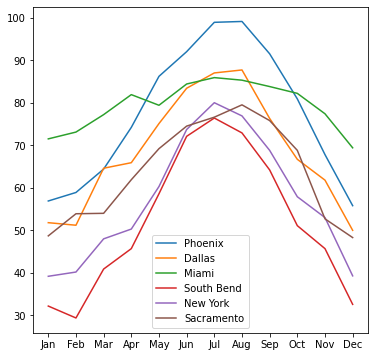

In [14]:
cities = list(frame.columns[2:])
print(cities)
months = calendar.month_abbr[1:13]
print(months)
year = 2020
# extract subframe of interest
f = frame[frame.Year == year]
plt.figure(figsize=(6, 6))
for city in cities:
    plt.plot(months, f[city], label=city)
plt.legend(loc='best');

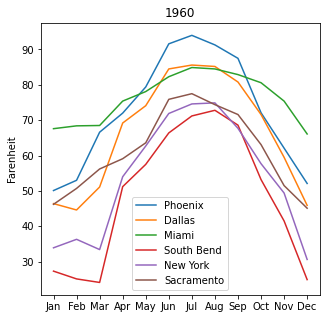

In [15]:
# bundle the above code as a function
def plot_one_year(frame, year, cmap=None, **kwargs):
    cities = list(frame.columns[2:])
    n = len(cities)
    months = calendar.month_abbr[1:13]
    f = frame[frame.Year == year]
    plt.figure(**kwargs)
    for i, city in enumerate(cities):
        c = cmap(i/(n-1)) if cmap else None
        plt.plot(months, f[city], c=c, label=city)
    plt.legend(loc='best');
    plt.title(str(year))
    plt.ylabel('Farenheit')

plot_one_year(frame, 1960, figsize=(5,5))

For this exercise, define the function 

    plot_one_month(frame, month, cmap=None, **kwargs) 
    
that draws a line graph over all years for given *month*. Assume *frame* has the format defined in this notebook and used in the previous function.

The following image results from the function call:

    plot_one_month(frame, 'Jan')

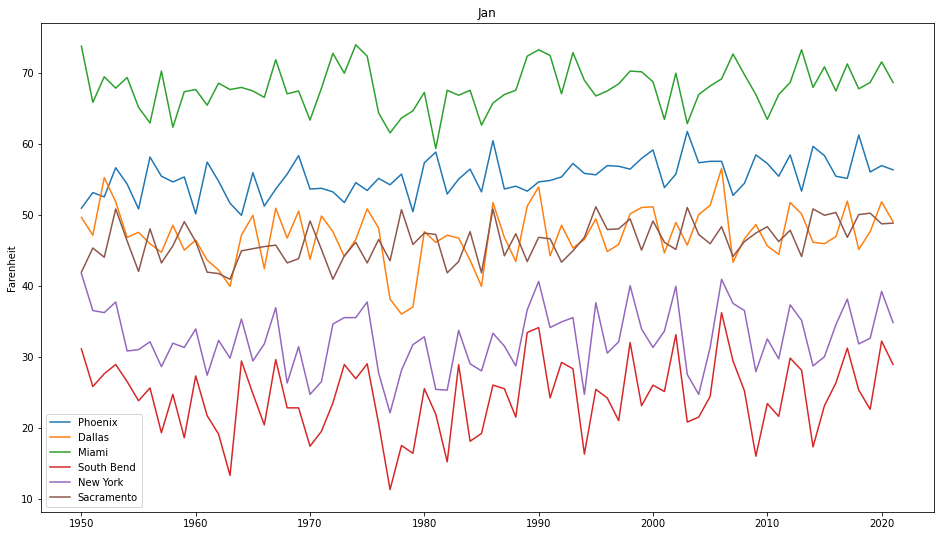

In [16]:
# Exercise 2 by Rene Tejon:

def plot_one_month(frame, month, cmap=None, **kwargs):
    cities = list(frame.columns[2:])
    f = frame[frame.Month == month]
    plt.figure(figsize=(16, 9))
    for city in cities:
        plt.plot(f.Year, f[city], label=city)
    plt.title(str(month))
    plt.ylabel('Farenheit')
    plt.legend(loc='best');
    
plot_one_month(frame, 'Jan')
# display_images(['ass2TempsA.png'])

### Exercise 3
We can use a bar graph to show the temperature for a given month and year for each city.

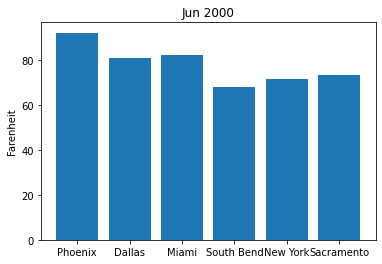

In [17]:
def barplot_year_month(frame, year, month, **kwargs):
    cities = list(frame.columns[2:])
    plt.figure(**kwargs)
    # rcd is the row indexed by year and month
    rcd = frame.loc[((frame.Year == year) & (frame.Month == month)), :].iloc[0]
    plt.bar(cities,rcd[2:].values)
    plt.title(month + ' ' + str(year))
    plt.ylabel('Farenheit')

barplot_year_month(frame, 2000, 'Jun')

For this excercise, write a version of function `barplot_year_month` that generates a bar graph whose bars are ordered by descending height (from warmest to coldest temperature.

    barplot_year_month(frame, 2000, 'Jan')

Year          2000
Month          Jun
Phoenix       92.1
Dallas        80.9
Miami         82.2
South Bend    67.8
New York      71.3
Sacramento    73.5
Name: 605, dtype: object
Phoenix       92.1
Miami         82.2
Dallas        80.9
Sacramento    73.5
New York      71.3
South Bend    67.8
Name: 605, dtype: object


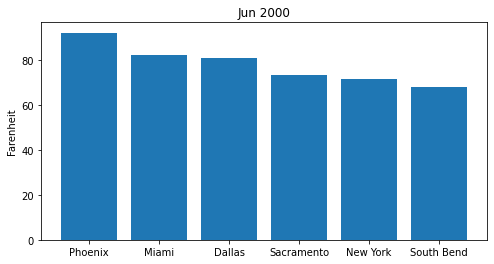

In [37]:
# Exercise 3 by Rene Tejon:

def barplot_year_month(frame, year, month, **kwargs):
    cities = list(frame.columns[2:])
    plt.figure(**kwargs)
    rcd = frame.loc[((frame.Year == year) & (frame.Month == month)), :].iloc[0]
    print(rcd)
    order = rcd[2:].sort_values(ascending=False)
    print(order)
    index_order = [i for i in order.index]
    plt.bar(index_order, order)    
    plt.title(month + ' ' + str(year))
    plt.ylabel('Farenheit')


barplot_year_month(frame, 2000, 'Jun', figsize=(8, 4))
# display_images(['ass2TempsB.png'])

### Exercise 4
Since the cities are unordered categorical data, we can show their temperatures using a dot plot. Each city's temperature values are depicted by a column of dots arranged along the vertical temperature axis. 

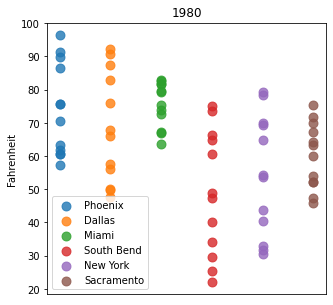

In [19]:
def dotplot_one_year(frame, year, cmap=None, **kwargs):
    cities = list(frame.columns[2:])
    n = len(cities)
    months = calendar.month_abbr[1:13]
    f = frame[frame.Year == year]
    plt.figure(**kwargs)
    for i, city in enumerate(cities):
        c = None
        if cmap:
            c = cmap(i/(n-1))
            c = [c] * 12
        plt.scatter([i]*12, f[city], label=city, c=c, s=80, alpha=0.8)
    plt.xticks([])
    plt.legend(loc='best');
    plt.title(str(year))
    plt.ylabel('Fahrenheit')

dotplot_one_year(frame, 1980, figsize=(5,5))

Write the function

    dotplot_one_month(frame, month, cmap, **kwargs)

that draws a dot plot over all years for a given month. I've written mine (pictured below) so that the dot opacity (alpha) varies from 0.1 to 0.5 as the years increase from the earliest year to the latest year.

    dotplot_one_month(frame, 'Jun', figsize=(4,6))

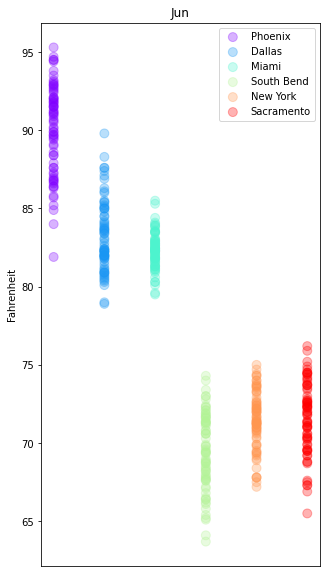

In [20]:
# Exercise 4 by Rene Tejon:

def dotplot_one_month(frame, month, cmap=None, **kwargs):
    cities = list(frame.columns[2:])
    n = len(cities)
    f = frame[frame.Month == month]
    plt.figure(**kwargs)
    for i, city in enumerate(cities):
        c = None
        if cmap:
            c = cmap(i/(n-1))
            c = [c] * len(f)
        plt.scatter([i] * len(f), f[city], label=city, c=c, s=80, alpha=(0.3))
    plt.xticks([])
    plt.legend(loc='best');
    plt.title(str(month))
    plt.ylabel('Fahrenheit')

cmap = plt.cm.rainbow
dotplot_one_month(frame, 'Jun', cmap=cmap, figsize=(5, 10))
# display_images(['ass2TempsC.png'])

### Exercise 5
We can also use a scatterplot to show variation in temperature in a given month over the range of years.

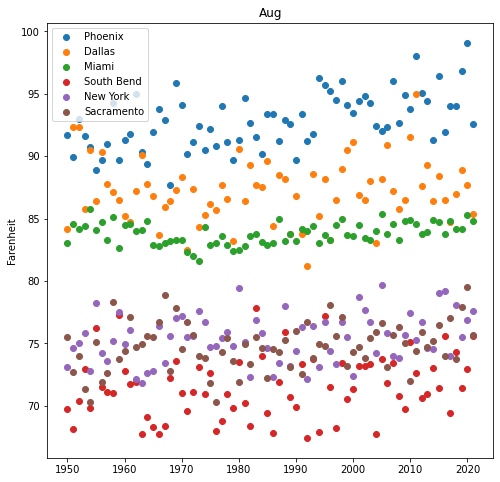

In [21]:
def scatterplot_one_month(frame, month, cmap=None, **kwargs):
    cities = list(frame.columns[2:])
    n = len(cities)
    f = frame[frame.Month == month]
    nyears = len(f)
    plt.figure(**kwargs)
    for i, city in enumerate(cities):
        c = None
        if cmap:
            c = cmap(i/(n-1))
            c = [c] * nyears
        plt.scatter(f.Year, f[city], c=c, label=city)
    plt.legend(loc='best');
    plt.title(str(month))
    plt.ylabel('Farenheit')

scatterplot_one_month(frame, 'Aug', figsize=(8,8))

For this exercise, draw best-fit lines through the scatterplot for each city. To compute the slope *m* and *y* intersect for a set of points with $x$ and $y$ coordinates:

    m, b = np.polyfit(xs, ys, 1)

Once you have *m* and *b*, you can draw a line from *(x1, m*x1+b)* to *(x2, m*x2+b)* where *x1* and *x2* are the first and last years respectively.

The following figure was produced by this call:

    scatterplot_one_month(frame, 'Aug')

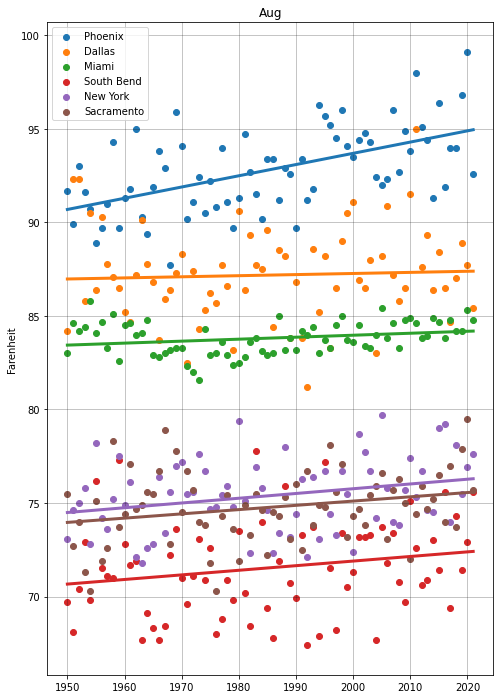

In [22]:
# Exercise 5 by Rene Tejon:

from scipy import stats


def scatterplot_one_month(frame, month, cmap=None, **kwargs):
    cities = list(frame.columns[2:])
    n = len(cities)
    f = frame[frame.Month == month]
    nyears = len(f)
    plt.figure(**kwargs)
    ax = plt.gca()
    ax.grid(color= (0.1, 0.1, 0.1), linestyle='-', linewidth=1, alpha=0.25)
    
    for i, city in enumerate(cities):
        c = None
        if cmap:
            c = cmap(i/(n-1))
            c = [c] * nyears
        
        slope, intercept, r_value, p_value, std_err = stats.linregress(f.Year, f[city])
        mn = np.min(f.Year)
        mx = np.max(f.Year)
        x = np.linspace(mn,mx,500)
        y = slope * x + intercept
        plt.scatter(f.Year, f[city], c=c, label=city)
        plt.plot(x, y, '-', linewidth=3)

    plt.legend(loc='best');
    plt.title(str(month))
    plt.ylabel('Farenheit')

scatterplot_one_month(frame, 'Aug', figsize=(8,12))

# display_images(['ass2TempsD.png'])